In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
hoops_df = pd.read_csv('../Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [3]:
hoops_df = hoops_df.drop(["G","TEAM","SEED","CONF","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [4]:
hoops_df.dropna(inplace=True)
hoops_df = hoops_df.reset_index(drop=True)

In [5]:
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
472,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
473,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
474,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [107]:
hoops_df.dtypes

W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
dtype: object

In [6]:
class_count = hoops_df['POSTSEASON'].value_counts()
class_count

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [7]:
classifications_to_replace = list(class_count.index)

In [8]:
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
472,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
473,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
474,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [10]:
for cls in classifications_to_replace:
    if cls == "R68":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"7")
    elif cls == "R64":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"7")
    elif cls == "R32":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"6")
    elif cls == "S16":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"5")
    elif cls == "E8":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"4")
    elif cls == "F4":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"3")
    elif cls == "2ND":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"2")
    elif cls == "Champions":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"1")

hoops_df['POSTSEASON'].value_counts()

7    252
6    112
5     56
4     28
3     14
2      7
1      7
Name: POSTSEASON, dtype: int64

In [11]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'], downcast='signed')
hoops_df.dtypes

W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON       int8
dtype: object

In [12]:
y = hoops_df[["POSTSEASON"]].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [118]:
y[60]

array([6], dtype=int8)

In [13]:
clf = RandomForestClassifier(random_state=47, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5126050420168067


/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[0.08622138 0.06851956 0.06408733 0.12194523 0.04115572 0.03808307
 0.04341159 0.04692077 0.04898024 0.04193824 0.04016453 0.04435297
 0.04701802 0.04198165 0.04295127 0.04373417 0.04941177 0.08912252]


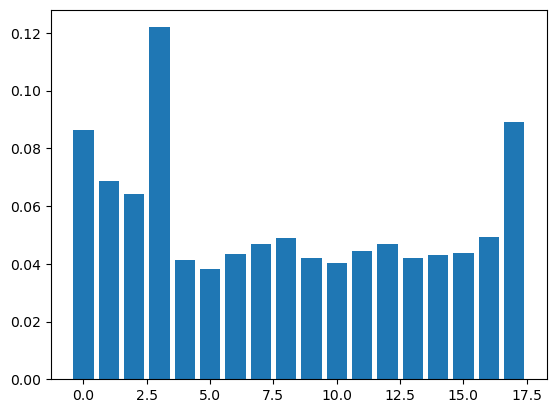

In [14]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [15]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(random_state=47))

In [16]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=47)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [17]:
X_train_scaled[0]

array([-0.87413024, -0.43855411, -0.19599718,  0.11223914, -0.87437569,
        0.50078608,  1.06564147, -0.62815746,  0.93074812, -1.20610316,
        0.05935908,  0.43399427, -0.56929985,  0.44547109, -0.88106216,
        0.40023991,  0.35707262,  0.23056262])

In [18]:
X_selected_train_scaled[0]

array([-0.87413024, -0.43855411, -0.19599718,  0.11223914,  0.23056262])

k: 1, Train/Test Score: 1.000/0.496
k: 3, Train/Test Score: 0.697/0.513
k: 5, Train/Test Score: 0.669/0.563
k: 7, Train/Test Score: 0.655/0.546
k: 9, Train/Test Score: 0.650/0.580
k: 11, Train/Test Score: 0.636/0.538
k: 13, Train/Test Score: 0.630/0.555
k: 15, Train/Test Score: 0.639/0.546
k: 17, Train/Test Score: 0.647/0.521
k: 19, Train/Test Score: 0.625/0.546


/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:1

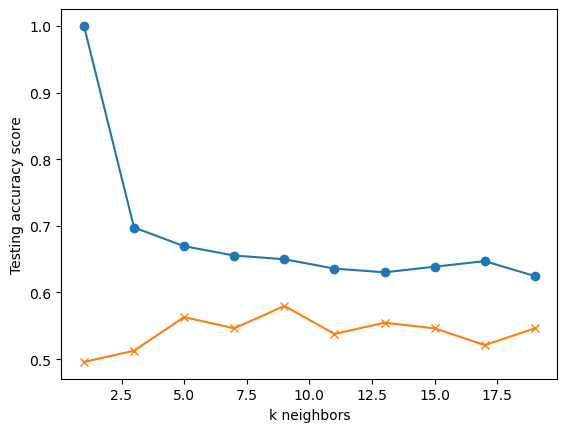

In [19]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_selected_train_scaled, y_train)
    train_score = knn.score(X_selected_train_scaled, y_train)
    test_score = knn.score(X_selected_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_selected_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_selected_test_scaled, y_test))

k=9 Test Acc: 0.580


/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [21]:
y_true = y_test
y_pred = knn.predict(X_selected_test_scaled)

confusion_matrix(y_true, y_pred)

array([[ 1,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  2,  3,  0],
       [ 0,  0,  0,  4,  2,  9,  4],
       [ 0,  0,  0,  0,  1, 13, 13],
       [ 0,  0,  1,  0,  3,  5, 52]])

In [22]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.20      0.14      0.17         7
           5       0.22      0.11      0.14        19
           6       0.42      0.48      0.45        27
           7       0.75      0.85      0.80        61

    accuracy                           0.58       119
   macro avg       0.30      0.27      0.28       119
weighted avg       0.54      0.58      0.55       119



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [129]:
clf2 = LogisticRegression(max_iter=10000)
clf2.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.6162464985994398
Testing Score: 0.5462184873949579


/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
y_true = y_test
y_pred = clf2.predict(X_selected_test_scaled)
confusion_matrix(y_true, y_pred)

array([[ 0,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  2,  0,  2,  1],
       [ 0,  0,  1,  1,  1, 11,  5],
       [ 0,  0,  0,  0,  0,  9, 18],
       [ 0,  0,  0,  0,  2,  6, 53]])

In [131]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.67      0.29      0.40         7
           5       0.25      0.05      0.09        19
           6       0.30      0.33      0.32        27
           7       0.69      0.87      0.77        61

    accuracy                           0.55       119
   macro avg       0.27      0.22      0.22       119
weighted avg       0.50      0.55      0.50       119



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [23]:
hoops20_df = pd.read_csv('../Resources/2020Predictions.csv')
hoops20_df = hoops20_df.drop(['Unnamed: 0'], axis=True)
hoops20_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0,0.0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8,0.0
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2,0.0
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8,0.0


In [24]:
tourney_df = hoops20_df.loc[hoops20_df["POSTSEASON"] == 1]

In [25]:
df = tourney_df[["W", "ADJOE", "ADJDE", "BARTHAG", "WAB"]]

In [26]:
X = df.values
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [27]:
predictions = knn.predict(X_scaled)
predictions

array([4, 4, 1, 3, 6, 6, 6, 6, 6, 3, 6, 6, 7, 7, 7, 7, 5, 5, 6, 6, 6, 7,
       7, 7, 6, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7], dtype=int8)

In [28]:
len(predictions)

68

In [31]:
pred_df = pd.DataFrame(predictions, columns=['POSTSEASON'])
pred_df

,POSTSEASON
0,4
1,4
2,1
3,3
4,6
...,...
63,7
64,7
65,7
66,7


In [32]:
df2 = hoops20_df.merge(pred_df, left_index=True, right_index=True)
df2

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON_x,POSTSEASON_y
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0,4
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0,4
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0,1
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0,3
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,64,Northern Iowa,MVC,29,25,111.8,99.8,0.7871,54.8,48.5,...,27.6,25.8,52.6,47.2,38.6,33.7,65.7,0.9,1.0,7
64,65,San Francisco,WCC,33,22,108.1,97.0,0.7780,51.3,50.2,...,29.4,31.9,52.2,47.7,33.5,37.6,68.8,-2.4,0.0,7
65,66,VCU,A10,31,18,104.8,94.1,0.7763,49.7,48.1,...,33.0,35.9,48.4,46.8,34.6,33.7,69.2,-3.6,0.0,7
66,67,Texas,B12,31,19,103.3,92.7,0.7761,49.9,46.9,...,22.0,35.3,49.7,46.3,33.5,32.2,65.9,1.0,1.0,7


In [33]:
df2.sort_values(by=['POSTSEASON_y', 'RK'], inplace=True)
df2

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON_x,POSTSEASON_y
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0,1
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0,3
9,10,San Diego St.,MWC,31,30,113.8,92.8,0.9119,54.6,45.2,...,28.3,30.6,53.0,45.3,37.9,30.1,64.7,6.7,1.0,3
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0,4
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,64,Northern Iowa,MVC,29,25,111.8,99.8,0.7871,54.8,48.5,...,27.6,25.8,52.6,47.2,38.6,33.7,65.7,0.9,1.0,7
64,65,San Francisco,WCC,33,22,108.1,97.0,0.7780,51.3,50.2,...,29.4,31.9,52.2,47.7,33.5,37.6,68.8,-2.4,0.0,7
65,66,VCU,A10,31,18,104.8,94.1,0.7763,49.7,48.1,...,33.0,35.9,48.4,46.8,34.6,33.7,69.2,-3.6,0.0,7
66,67,Texas,B12,31,19,103.3,92.7,0.7761,49.9,46.9,...,22.0,35.3,49.7,46.3,33.5,32.2,65.9,1.0,1.0,7


In [34]:
df3 = df2.reset_index()

In [35]:
for index, row in df3.iterrows():
    if index == 1:
        df3.at[index, "POSTSEASON_y"] = 2
    elif index == 2 or index == 3:
        df3.at[index, "POSTSEASON_y"] = 4
    elif 4 <= index <= 7:
        df3.at[index, "POSTSEASON_y"] = 8
    elif 8 <= index <= 15:
        df3.at[index, "POSTSEASON_y"] = 16
    elif 16 <= index <= 31:
        df3.at[index, "POSTSEASON_y"] = 32
    elif 32 <= index <= 67:
        df3.at[index, "POSTSEASON_y"] = 68
    else:
        df3.at[index, "POSTSEASON_y"] = 1

df3

,index,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON_x,POSTSEASON_y
0,2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,...,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0,1
1,3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,...,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0,2
2,9,10,San Diego St.,MWC,31,30,113.8,92.8,0.9119,54.6,...,28.3,30.6,53.0,45.3,37.9,30.1,64.7,6.7,1.0,4
3,0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,...,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0,4
4,1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,...,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,64,Northern Iowa,MVC,29,25,111.8,99.8,0.7871,54.8,...,27.6,25.8,52.6,47.2,38.6,33.7,65.7,0.9,1.0,68
64,64,65,San Francisco,WCC,33,22,108.1,97.0,0.7780,51.3,...,29.4,31.9,52.2,47.7,33.5,37.6,68.8,-2.4,0.0,68
65,65,66,VCU,A10,31,18,104.8,94.1,0.7763,49.7,...,33.0,35.9,48.4,46.8,34.6,33.7,69.2,-3.6,0.0,68
66,66,67,Texas,B12,31,19,103.3,92.7,0.7761,49.9,...,22.0,35.3,49.7,46.3,33.5,32.2,65.9,1.0,1.0,68


In [36]:
df3.loc[df3['index'].between(0, 3), "SEED"] = 1
df3.loc[df3['index'].between(4, 7), "SEED"] = 2
df3.loc[df3['index'].between(8, 11), "SEED"] = 3
df3.loc[df3['index'].between(12, 15), "SEED"] = 4
df3.loc[df3['index'].between(16, 19), "SEED"] = 5
df3.loc[df3['index'].between(20, 23), "SEED"] = 6
df3.loc[df3['index'].between(24, 27), "SEED"] = 7
df3.loc[df3['index'].between(28, 31), "SEED"] = 8
df3.loc[df3['index'].between(32, 35), "SEED"] = 9
df3.loc[df3['index'].between(36, 39), "SEED"] = 10
df3.loc[df3['index'].between(40, 45), "SEED"] = 11
df3.loc[df3['index'].between(46, 49), "SEED"] = 12
df3.loc[df3['index'].between(50, 53), "SEED"] = 13
df3.loc[df3['index'].between(54, 57), "SEED"] = 14
df3.loc[df3['index'].between(58, 61), "SEED"] = 15
df3.loc[df3['index'].between(62, 68), "SEED"] = 16

In [37]:
df3.head(25)

,index,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON_x,POSTSEASON_y,SEED
0,2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,...,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0,1,1.0
1,3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,...,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0,2,1.0
2,9,10,San Diego St.,MWC,31,30,113.8,92.8,0.9119,54.6,...,30.6,53.0,45.3,37.9,30.1,64.7,6.7,1.0,4,3.0
3,0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,...,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0,4,1.0
4,1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,...,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0,8,1.0
5,16,17,BYU,WCC,31,24,115.9,96.0,0.8973,58.1,...,27.9,54.8,50.8,41.9,30.3,69.4,2.7,1.0,8,5.0
6,17,18,Oregon,P12,31,24,117.5,97.4,0.8968,54.3,...,29.5,51.4,46.2,39.6,32.6,65.2,4.7,1.0,8,5.0
7,25,26,Maryland,B10,31,24,112.6,94.7,0.8797,48.6,...,24.2,50.1,44.5,31.1,32.5,67.1,6.8,1.0,8,7.0
8,4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,...,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0,16,2.0
9,5,6,Duke,ACC,31,25,115.3,91.9,0.9310,52.6,...,30.9,52.5,46.0,35.2,29.9,71.7,5.1,1.0,16,2.0


In [38]:
tourney_predictions = df3.drop(["POSTSEASON_x"], axis=1)
tourney_predictions

,index,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON_y,SEED
0,2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,...,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1,1.0
1,3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,...,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,2,1.0
2,9,10,San Diego St.,MWC,31,30,113.8,92.8,0.9119,54.6,...,28.3,30.6,53.0,45.3,37.9,30.1,64.7,6.7,4,3.0
3,0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,...,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,4,1.0
4,1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,...,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,64,Northern Iowa,MVC,29,25,111.8,99.8,0.7871,54.8,...,27.6,25.8,52.6,47.2,38.6,33.7,65.7,0.9,68,16.0
64,64,65,San Francisco,WCC,33,22,108.1,97.0,0.7780,51.3,...,29.4,31.9,52.2,47.7,33.5,37.6,68.8,-2.4,68,16.0
65,65,66,VCU,A10,31,18,104.8,94.1,0.7763,49.7,...,33.0,35.9,48.4,46.8,34.6,33.7,69.2,-3.6,68,16.0
66,66,67,Texas,B12,31,19,103.3,92.7,0.7761,49.9,...,22.0,35.3,49.7,46.3,33.5,32.2,65.9,1.0,68,16.0


In [39]:
tourney_predictions = tourney_predictions.rename(columns={'POSTSEASON_y':'POSTSEASON'})

In [40]:
tourney_predictions

,index,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,...,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1,1.0
1,3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,...,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,2,1.0
2,9,10,San Diego St.,MWC,31,30,113.8,92.8,0.9119,54.6,...,28.3,30.6,53.0,45.3,37.9,30.1,64.7,6.7,4,3.0
3,0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,...,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,4,1.0
4,1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,...,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,64,Northern Iowa,MVC,29,25,111.8,99.8,0.7871,54.8,...,27.6,25.8,52.6,47.2,38.6,33.7,65.7,0.9,68,16.0
64,64,65,San Francisco,WCC,33,22,108.1,97.0,0.7780,51.3,...,29.4,31.9,52.2,47.7,33.5,37.6,68.8,-2.4,68,16.0
65,65,66,VCU,A10,31,18,104.8,94.1,0.7763,49.7,...,33.0,35.9,48.4,46.8,34.6,33.7,69.2,-3.6,68,16.0
66,66,67,Texas,B12,31,19,103.3,92.7,0.7761,49.9,...,22.0,35.3,49.7,46.3,33.5,32.2,65.9,1.0,68,16.0


In [41]:
tourney_predictions.to_csv("../Resources/2020TournamentPredictions.csv", sep=',', encoding='utf-8')